# **1. Sentiment Analysis**

Sentiment Analysis if a task done in NLP to find the sentiment of a given document of text. The idea is to find the user sentiment whether it is postive, negative, or neutral given the document written by him/her.

Sentiment Analysis will give us some important information about user intent, behaviour and how a product of service is performing among users. There are different methods in NLP to perform Sentiment Analysis, like we can build Neural Language Models to recognize sentiment, but one simple and efficient sentiment analysis algorithm is Naive Bayes, which model the probability of a document being in a particular class.

## **1.1 Naive Bayes for Sentiment Analysis**

Naive Bayes is a probabilistic model used to estimate the likelihood of a particular class or outcome based on input feature evidence. It is a popular and simple model for sentiment analysis, offering better performance with less computation compared to complex neural architectures for text classification tasks.

Naive Bayes assumes that the features of words are independent of each other, hence the term 'Naive'. It does not consider the relationship between words or features. Instead, it treats each word and its corresponding target individually to model the probability of that word occurring given the document or context.

The Naive Bayes algorithm is derived from the well-known **Bayes' theorem**, which uses conditional probabilities to understand how to update our beliefs in light of new evidence.

For sentiment analysis task, out main goal is to identify the sentiment class $c$ given a document $d$:

$$P(c|d)$$

For multiple classes, Naive bayes will give us probability for each of them given the document, for finding the right class we have to calculate the argmax of $P(c|d)$

$$\hat{c} = \arg \max_{c \in C} P(c|d)$$

For finding the probability of class given document, we have bayes theorem:

$$\hat{c} = \arg\max_{c \in C} P(c|d) = \arg\max_{c \in C} \frac{P(d|c)P(c)}{P(d)}$$

To simplyfy the equation, we can remove the denominator since $P(d)$ does not change for each class; it remains constant, out goal is to find the most likely class for same document d (Since we are dealing with one single document at a time to classify it to a class).

$$\hat{c} = \arg\max_{c \in C} P(c|d) = \arg\max_{c \in C} P(d|c)P(c)$$

* Here $P(d|c)$ is the likelyhood of a document to be in a particualr class
* $P(c)$ is the prior probability.

Document is not the entire document itself, it is set of features (words), so we can form the equation as:

$$
\hat{c} = \underset{c \in C}{\mathrm{argmax}} \ P(f_1, f_2, ..., f_n|c) \ P(c)
$$

Here Naive bayes assumes that each of the features are independed to each other and dependent to the class only. So we can find the probabilities for each feature given c independently:

$$P(f_1, f_2, ..., f_n|c) = P(f_1|c) \cdot P(f_2|c) \cdot \ldots \cdot P(f_n|c)$$

So the general term will be:

$$\hat{c}_{\text{NB}} = \arg\max_{c \in C} P(c) \times \prod_{f \in F} P(f | c)$$

To simply computation and modeling probabilities, we usually do Naive bayes in log space,

$$\hat{c}_{\text{NB}} = \arg\max_{c \in C} \log P(c) + \sum_{i \in \text{positions}} \log P(w_i | c)$$

## **1.2 Training Naive Bayes for Sentiment Analysis**

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Natural-Language-Processing/twitter_training.csv', encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/Natural-Language-Processing/twitter_validation.csv', encoding='utf-8')

In [ ]:
df_train.columns = ['E', 'Company', 'sentiment', 'text']
df_test.columns = ["E", 'Company', 'sentiment', 'text']
#df = pd.concat([df_test, df_train], axis = 1, ignore_index = True)

In [ ]:
df_train

,E,Company,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
df_test

,E,Company,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df = pd.concat([df_train, df_test], axis = 0, ignore_index = True)

In [ ]:
df

,E,Company,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
75675,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75678,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.isna().any()

E            False
Company      False
sentiment    False
text          True
dtype: bool

In [ ]:
df.dropna(subset=['text'], inplace=True)

In [ ]:
df = df[df['sentiment'] != 'Irrelevant']

In [ ]:
df['sentiment'].value_counts()

sentiment
Negative    22624
Positive    20931
Neutral     18393
Name: count, dtype: int64

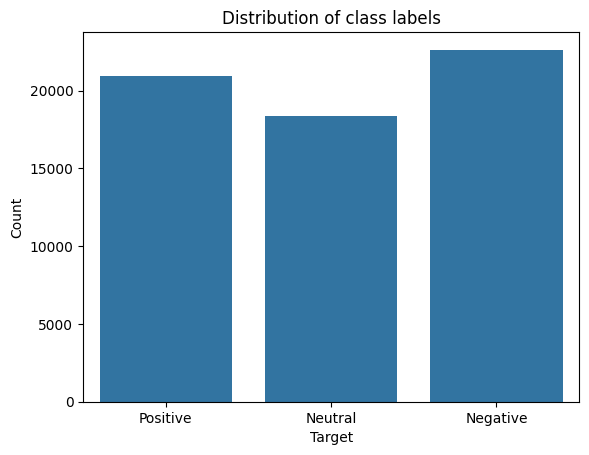

In [ ]:
sns.countplot(x = df['sentiment'])
plt.title("Distribution of class labels")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

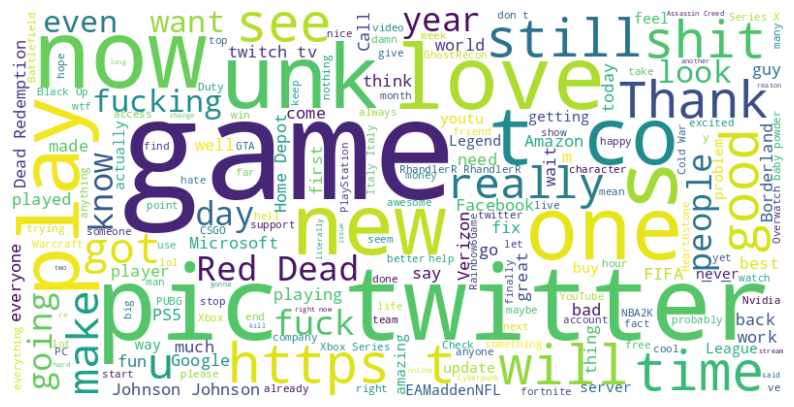

In [ ]:
text_combined = ' '.join(df['text'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text_combined)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#documents = list(zip(df['text'],  df['sentiment']))

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stemmer = LancasterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    #stemmed_tokens = [token for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [ ]:
X = df['text']
y = df['sentiment']

X_preprocessed = X.apply(preprocess_text)

In [ ]:
X_preprocessed

0                                    coming borders kill ,
1                            im getting borderlands kill ,
2                           im coming borderlands murder ,
3                        im getting borderlands 2 murder ,
4                          im getting borderlands murder ,
                               ...                        
75673    Please explain possible ! let companies overch...
75674    Good Sony . much want see new PS5 , 's going r...
75677    Today sucked ’ time drink wine n play borderla...
75678       Bought fraction Microsoft today . Small wins .
75679    Johnson & Johnson stop selling talc baby powde...
Name: text, Length: 61948, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [ ]:
X_train

54681    com Whos ready zombie royale warzone stream to...
73889    Another success Nvidia . Folding @ Home distri...
42861    3 Celebrities question ban PUBG Pakistan thepa...
42537    V `` Digital Strike ! `` India banned 48 Chine...
45925                                                Omg @
                               ...                        
67163    Oklahoma Judge ordered company Johnson & Johns...
47441                                  Fuck hoes forreal .
960      Chaos murder galore ! 's time .. twitch.tv / b...
19426    , EvaX , humbly submit letter Craig Alexander ...
69736    LETS GOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
Name: text, Length: 49558, dtype: object

In [ ]:
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [ ]:
X_train_counts.toarray()[0].shape

(25934,)

In [ ]:
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB()

In [ ]:
y_pred = clf.predict(X_test_counts)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [ ]:
example_text = "This is often good and seems better"
preprocessed_example = preprocess_text(example_text)
print(preprocessed_example)

preprocessed_example_counts = vectorizer.transform([preprocessed_example])
predicted_sentiment = clf.predict(preprocessed_example_counts)
print("Predicted Sentiment:", predicted_sentiment[0])

often good seems better
Predicted Sentiment: Positive


In [ ]:
import joblib

joblib.dump(clf, 'naive_bayes.pkl')
joblib.dump(vectorizer, 'tfidf_vec.pkl')

['tfidf_vec.pkl']